<a href="https://colab.research.google.com/github/Aditya200125/machinelearning/blob/main/decissiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df= pd.read_csv("/content/heart.csv")

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
df.duplicated().sum()

np.int64(1)

In [31]:
df.drop_duplicates(inplace=True)


In [32]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]>

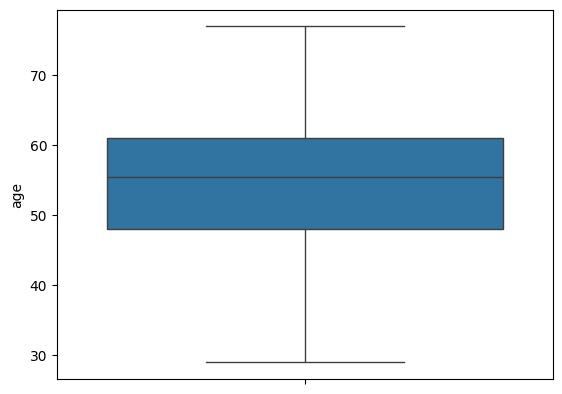

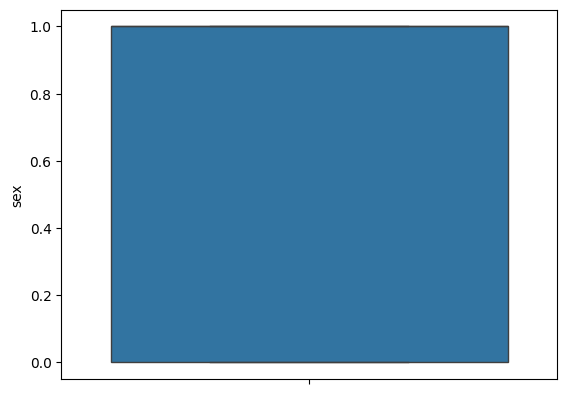

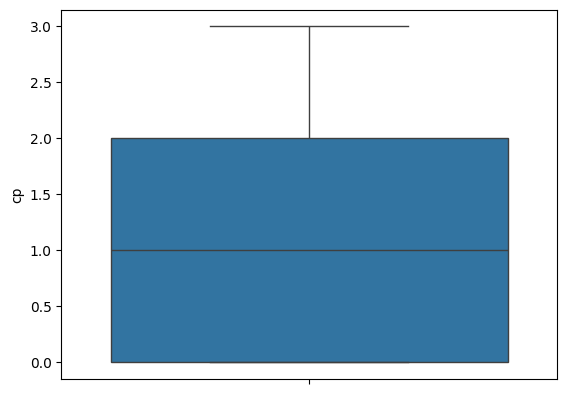

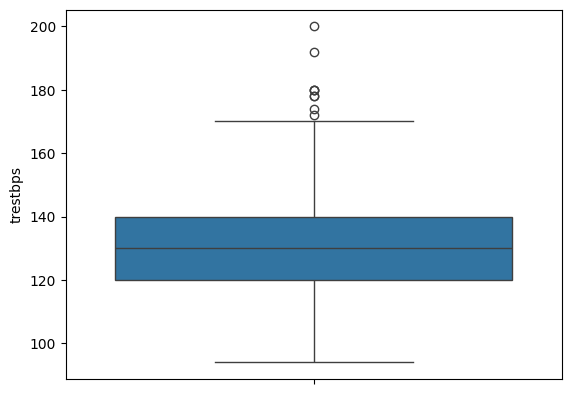

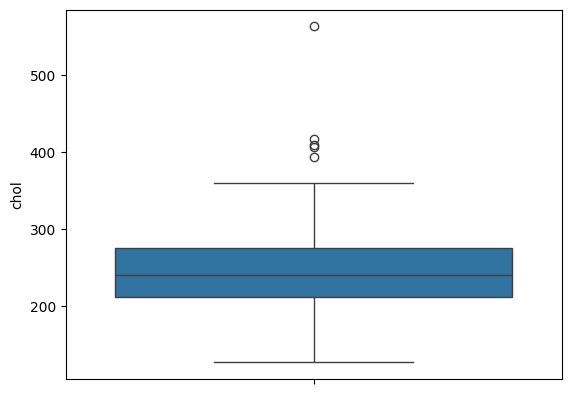

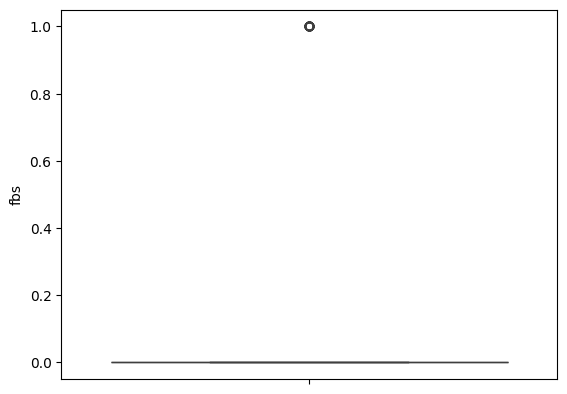

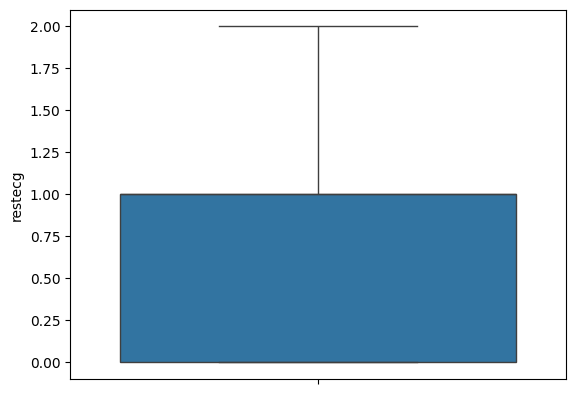

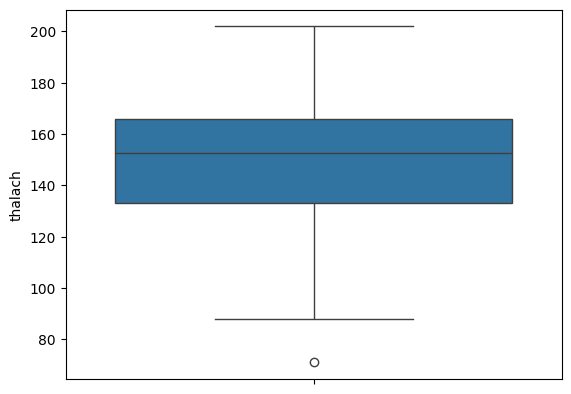

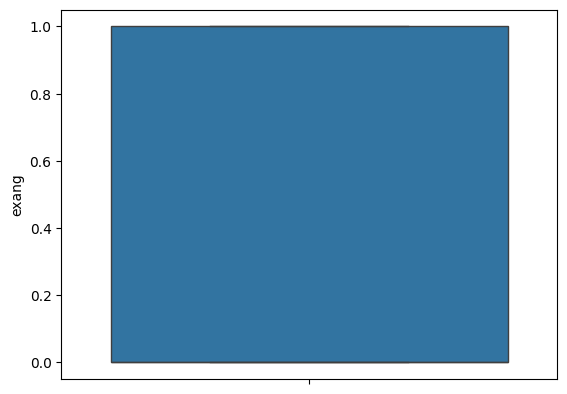

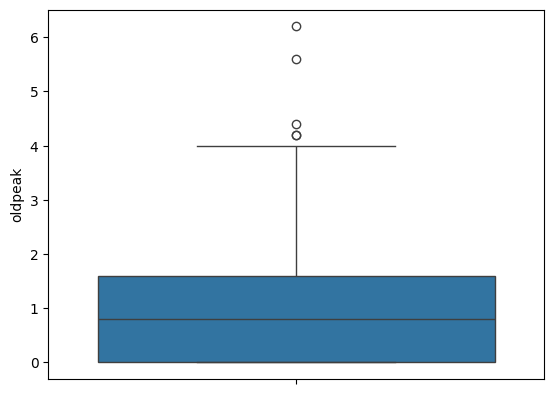

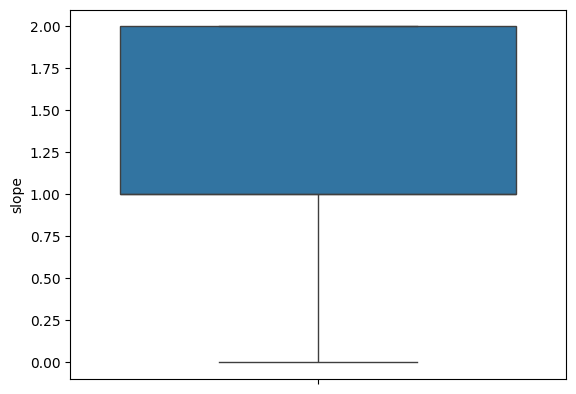

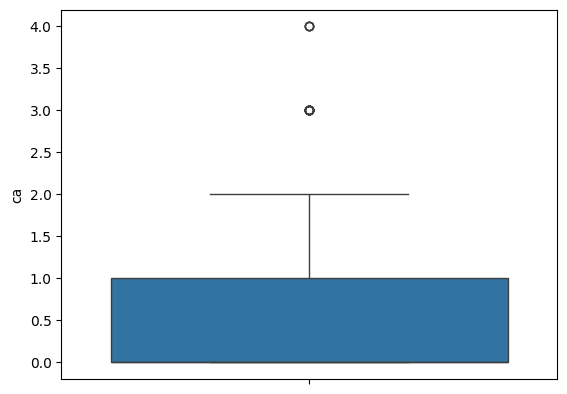

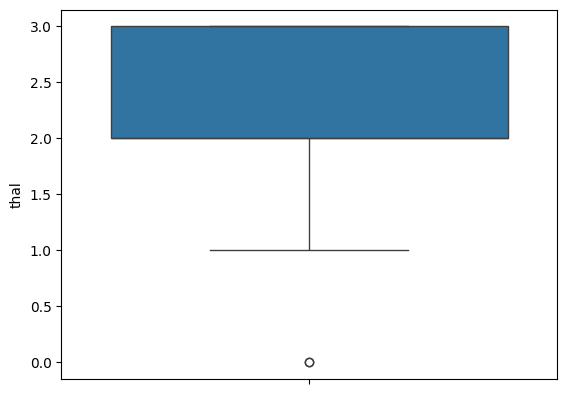

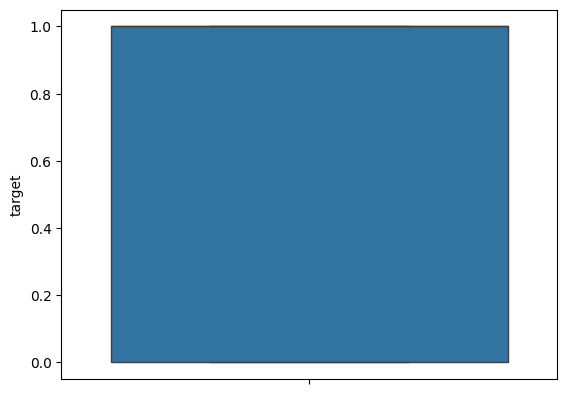

In [34]:
for col in df.columns:
  if df[col].dtype!=object:
    sns.boxplot(df[col])
    plt.show()

<Axes: >

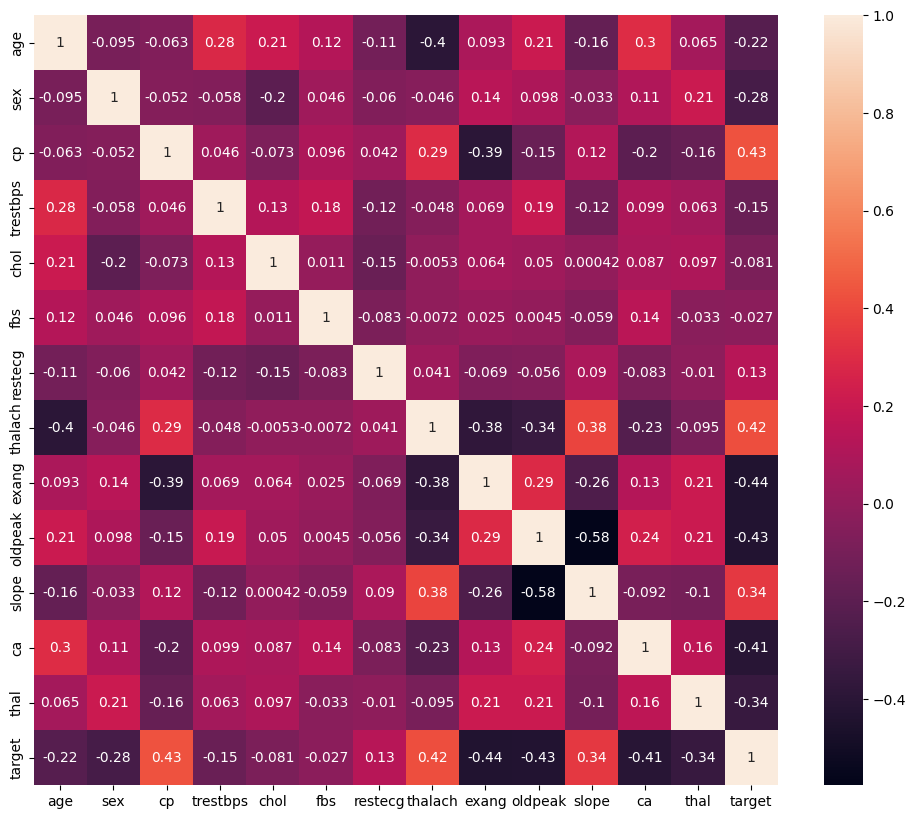

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True )

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt =DecisionTreeClassifier()

In [49]:
x = df.iloc[:,:-1]
y = df['target']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state= 42)

In [52]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred = dt.predict(x_test)

In [54]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [55]:
from sklearn.metrics import *

In [56]:
accuracy_score(y_test,y_pred)

0.7704918032786885

In [57]:
from sklearn.model_selection import *

In [58]:
depth =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [59]:
for i in depth:
  model = DecisionTreeClassifier(max_depth = i,random_state = 42)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print(f"the accuracy of model for max depth {i} is {acc}")

the accuracy of model for max depth 1 is 0.7213114754098361
the accuracy of model for max depth 2 is 0.7377049180327869
the accuracy of model for max depth 3 is 0.7868852459016393
the accuracy of model for max depth 4 is 0.8032786885245902
the accuracy of model for max depth 5 is 0.8032786885245902
the accuracy of model for max depth 6 is 0.7704918032786885
the accuracy of model for max depth 7 is 0.7704918032786885
the accuracy of model for max depth 8 is 0.7868852459016393
the accuracy of model for max depth 9 is 0.7704918032786885
the accuracy of model for max depth 10 is 0.7868852459016393
the accuracy of model for max depth 11 is 0.7704918032786885
the accuracy of model for max depth 12 is 0.7704918032786885
the accuracy of model for max depth 13 is 0.7704918032786885
the accuracy of model for max depth 14 is 0.7704918032786885
the accuracy of model for max depth 15 is 0.7704918032786885


In [60]:
final_model = DecisionTreeClassifier(max_depth = 4,random_state = 42)
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [61]:
acc

0.8032786885245902

In [62]:
from sklearn.tree import plot_tree

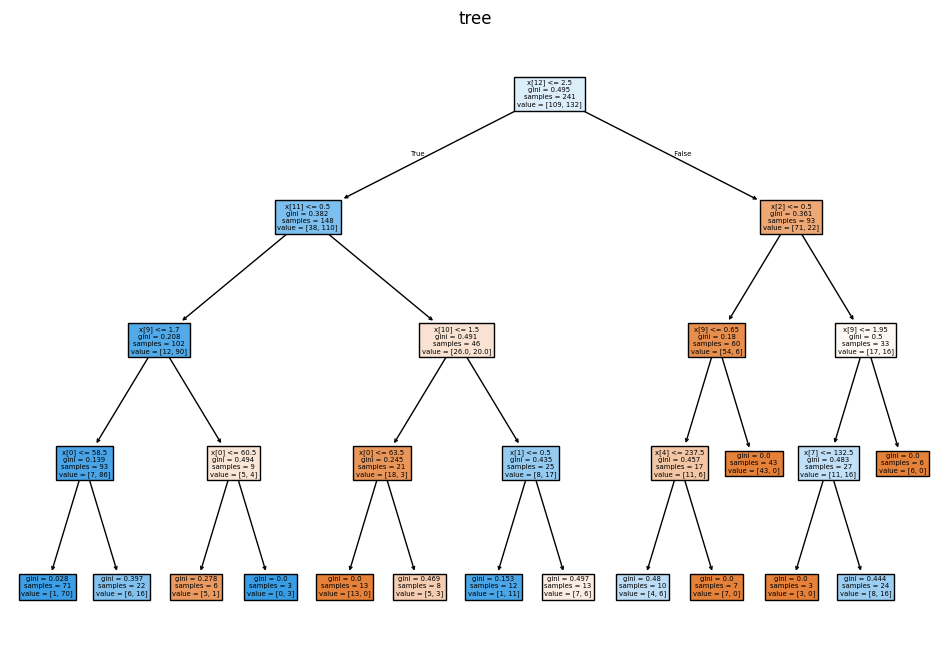

In [63]:
plt.figure(figsize =(12,8))
plot_tree(final_model,filled = True)
plt.title("tree")
plt.show()